In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# poradi specijalni znaci
data = pd.read_csv(
    "/content/FR_youtube_trending_data.csv",
    encoding='utf-8',
    on_bad_lines='skip',
    sep=',',
    engine='python'
)

In [ ]:
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           5292 non-null   object
 1   title              5292 non-null   object
 2   publishedAt        5292 non-null   object
 3   channelId          5292 non-null   object
 4   channelTitle       5292 non-null   object
 5   categoryId         5292 non-null   int64 
 6   trending_date      5292 non-null   object
 7   tags               5292 non-null   object
 8   view_count         5292 non-null   int64 
 9   likes              5292 non-null   int64 
 10  dislikes           5292 non-null   int64 
 11  comment_count      5292 non-null   int64 
 12  thumbnail_link     5292 non-null   object
 13  comments_disabled  5292 non-null   bool  
 14  ratings_disabled   5292 non-null   bool  
 15  description        5229 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usa

In [ ]:
data.shape

(5292, 16)

In [ ]:
data.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [ ]:
data = data.dropna(subset=['description'])

In [ ]:
data.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [ ]:
print(data.duplicated().sum())

2


In [ ]:
data = data.drop_duplicates(subset='video_id', keep='first')

In [ ]:
print("Duplicates removed, new shape:", data.shape)

Duplicates removed, new shape: (1353, 16)


In [ ]:
# top 10 videa spored vkupni pregledi
popular_channels = (
    data.groupby('channelTitle')
        .agg(total_views=('view_count', 'sum'))
        .sort_values(by='total_views', ascending=False)
        .head(10)
        .reset_index()
)

top_channels = popular_channels['channelTitle'].tolist()

In [ ]:
top_video_per_channel = (
    data[data['channelTitle'].isin(top_channels)]
    .sort_values(by='view_count', ascending=False)
    .groupby('channelTitle')
    .head(1)
    .reset_index(drop=True)
)

print(top_video_per_channel[['channelTitle', 'title', 'view_count']])

        channelTitle                                              title  \
0            Cardi B  Cardi B - WAP feat. Megan Thee Stallion [Offic...   
1     Big Hit Labels                 BTS (방탄소년단) 'Dynamite' Official MV   
2          BLACKPINK    BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
3     TREASURE (트레저)                               TREASURE - 'BOY' M/V   
4          BANGTANTV  [CHOREOGRAPHY] BTS (방탄소년단) 'Dynamite' Dance Pr...   
5             Michou              Michou - Dans le club (Clip Officiel)   
6                MTV              BTS Performs Dynamite | 2020 MTV VMAs   
7  JYP Entertainment                                 ITZY “Not Shy” M/V   
8              Ozuna  Ozuna x Karol G x Myke Towers - Caramelo Remix...   
9           SQUEEZIE              la vengeance de ce mec est incroyable   

   view_count  
0    76805026  
1    57229275  
2    51234434  
3    18535008  
4    10404157  
5     9255483  
6     8946265  
7     6620953  
8     6354942  
9     4323420 

**Visualization**

/tmp/ipython-input-3772785633.py:16: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3772785633.py:16: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3772785633.py:16: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print

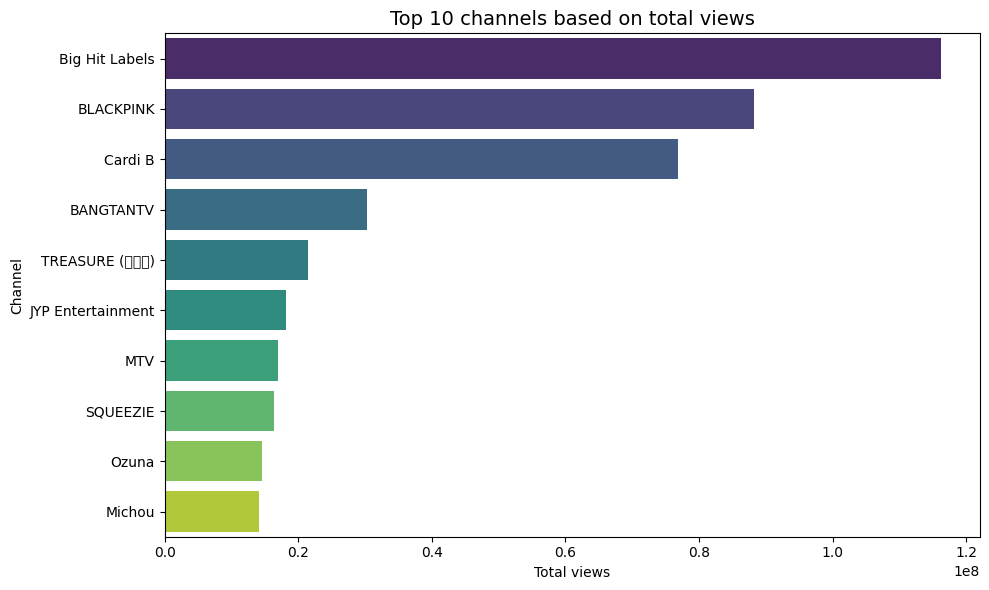

In [ ]:
# grupiranje i sortiranje po vkupno views
plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_views',
    y='channelTitle',
    data=popular_channels,
    hue="channelTitle",
    dodge=False,
    legend=False,
    palette='viridis'
)

plt.title("Top 10 channels based on total views", fontsize=14)
plt.xlabel("Total views")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3142959863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3142959863.py:12: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3142959863.py:12: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3142959863.py:12: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3142959863.py:12: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3142959863.py:12: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/c

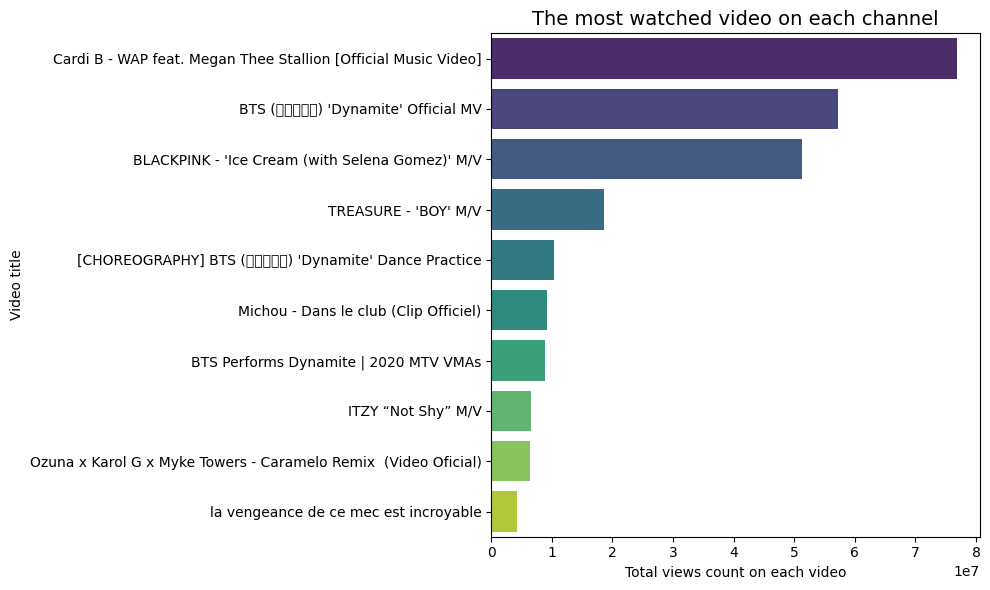

In [ ]:
# na broj na videa po kanal
plt.figure(figsize=(10, 6))
sns.barplot(
    x='view_count',
    y='title',
    data=top_video_per_channel,
    palette='viridis'
)
plt.title("The most watched video on each channel", fontsize=14)
plt.xlabel("Total views count on each video")
plt.ylabel("Video title")
plt.tight_layout()
plt.show()

**Content analysis**

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd

# videa od top 10
top_videos_data = data[data['channelTitle'].isin(top_channels)].copy()
top_videos_data.reset_index(drop=True, inplace=True)

# kreirame full_text kolona za klasteriranje
top_videos_data['full_text'] = (
    top_videos_data['title'].fillna('') + ' ' +
    top_videos_data['tags'].fillna('') + ' ' +
    top_videos_data['description'].fillna('')
)

# encoding na tekstot
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(top_videos_data['full_text'], show_progress_bar=True)

# KMeans klasteriranje
kmeans = KMeans(n_clusters=5, random_state=42)
top_videos_data['cluster'] = kmeans.fit_predict(embeddings)

# top_videos_data ima kolona 'cluster' so brojot na klaster
print(top_videos_data[['channelTitle', 'title', 'cluster']].head())


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

        channelTitle                                              title  \
0  JYP Entertainment                          ITZY “Not Shy” M/V TEASER   
1  JYP Entertainment   박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   
2             Michou              Michou - Dans le club (Clip Officiel)   
3           SQUEEZIE              la vengeance de ce mec est incroyable   
4            Cardi B  Cardi B - WAP feat. Megan Thee Stallion [Offic...   

   cluster  
0        2  
1        2  
2        4  
3        4  
4        0  


/tmp/ipython-input-4198400103.py:15: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4198400103.py:15: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4198400103.py:15: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print

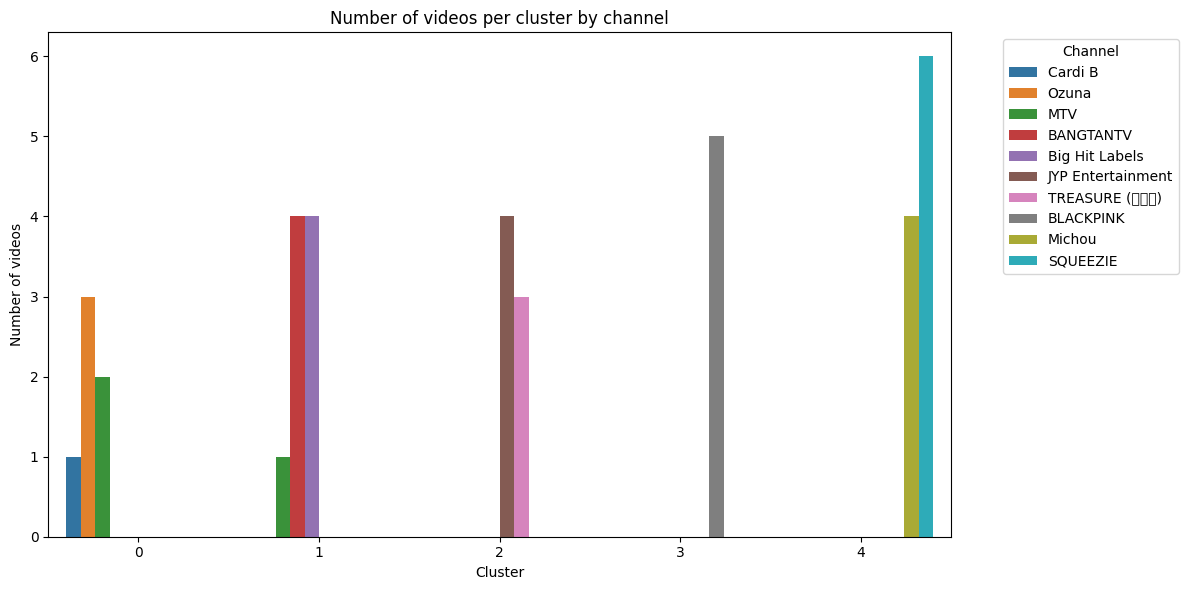

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(
    data=top_videos_data,  # go koristime dadeniot dataframe
    x='cluster',
    hue='channelTitle',
    palette='tab10'
)
plt.title('Number of videos per cluster by channel')
plt.xlabel('Cluster')
plt.ylabel('Number of videos')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# zemi unikatni naslovi podolgi od 10 karakteri
titles = data['title'].dropna().unique().tolist()
titles = [t for t in titles if len(t) > 10]

# primerok od 500 videa
titles_sample = titles[:500]

# embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(titles_sample, show_progress_bar=True)

# KMeans klastering so 5 klasteri
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/tmp/ipython-input-3107221840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=cluster_df, palette='Set2')


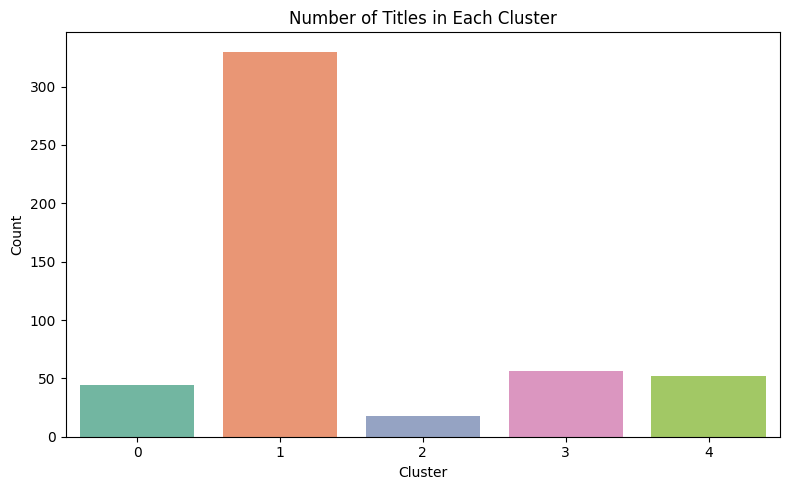

In [ ]:
cluster_df = pd.DataFrame({'title': titles_sample, 'cluster': clusters})

plt.figure(figsize=(8,5))
sns.countplot(x='cluster', data=cluster_df, palette='Set2')
plt.title("Number of Titles in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
for i in range(5):
    print(f"\n Cluster {i} samples:")
    examples = cluster_df[cluster_df['cluster'] == i]['title'].head(3)
    for t in examples:
        print("-", t)


 Cluster 0 samples:
- Juice WRLD & The Weeknd - Smile (Official Video)
- Jorja Smith - By Any Means (Official Video)
- Selena Gomez - This is the Year (Official Premiere Event)

 Cluster 1 samples:
- ON EST POSITIF AU COVID-19 (coronavirus)
- PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AVEC @Michou !
- L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE

 Cluster 2 samples:
- Apex Legends | Stories from the Outlands – “The Endorsement”
- FUT 21 | Official Trailer
- MUSE - Simulation Theory Film [Official Trailer]

 Cluster 3 samples:
- FRANGLISH - My Salsa feat. Tory Lanez (clip officiel)
- MÉLI-MÉLO... le 3.
- Inoxtag - Funkinox ft. Kazzey (Clip officiel)

 Cluster 4 samples:
- ITZY “Not Shy” M/V TEASER
- 박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V
- Dreamcatcher(드림캐쳐) 'BOCA' MV Teaser #01


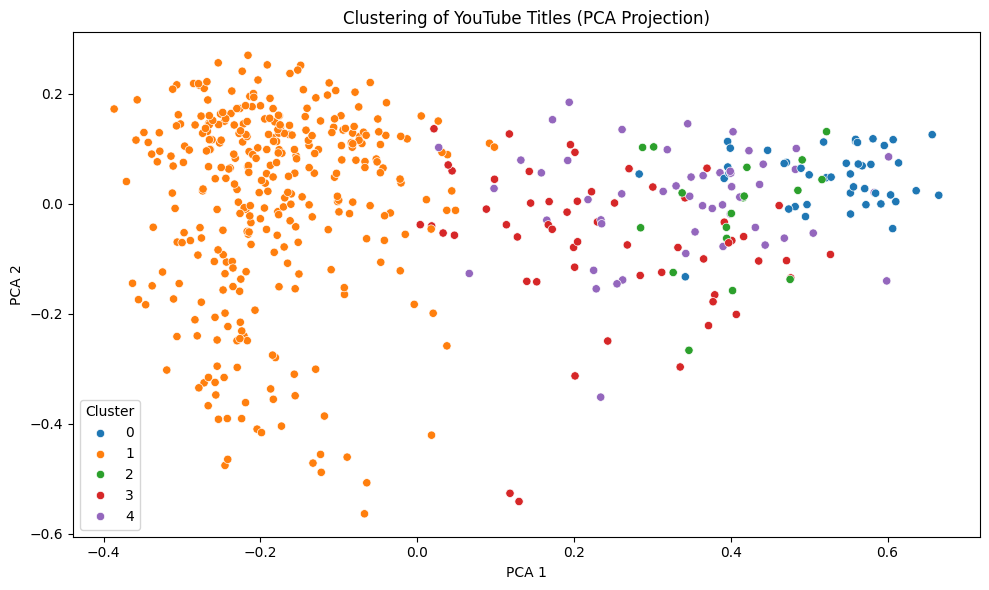

In [ ]:
from sklearn.decomposition import PCA

#namaluvam dimenzii so 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

#koordinati na df
cluster_df['x'] = pca_result[:, 0]
cluster_df['y'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=cluster_df, palette='tab10')
plt.title("Clustering of YouTube Titles (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vektorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrica = vektorizer.fit_transform(top_videos_data['full_text'])

zborovi = vektorizer.get_feature_names_out()
top_videos_data = top_videos_data.reset_index(drop=True)

for klaster_id in sorted(top_videos_data['cluster'].unique()):
    indeksi_vo_klaster = top_videos_data[top_videos_data['cluster'] == klaster_id].index
    prosechen_tfidf = tfidf_matrica[indeksi_vo_klaster].mean(axis=0)

    # Претворање во numpy array
    prosechen_tfidf_array = np.asarray(prosechen_tfidf).ravel()

    top_indeksi = np.argsort(prosechen_tfidf_array)[-10:][::-1]
    top_zborovi = [zborovi[i] for i in top_indeksi]

    print(f"\n- Most common words in cluster {klaster_id}:")
    print(", ".join(top_zborovi))



- Most common words in cluster 0:
mtv, ozuna, que, caramelo, el, cardi, te, los, yo, megan

- Most common words in cluster 1:
bts, com, kim, lee, www, http, 방탄소년단, https, mtv, ibighit

- Most common words in cluster 2:
itzy, treasure, 트레저, 있지, www, com, oh, boy, kids, shy

- Most common words in cluster 3:
ice, cream, blackpink, 블랙핑크, gomez, selena, yg, 셀레나, 고메즈, chillin

- Most common words in cluster 4:
squeezie, michou, http, pas, dans, respecter, par, www, ly, bit


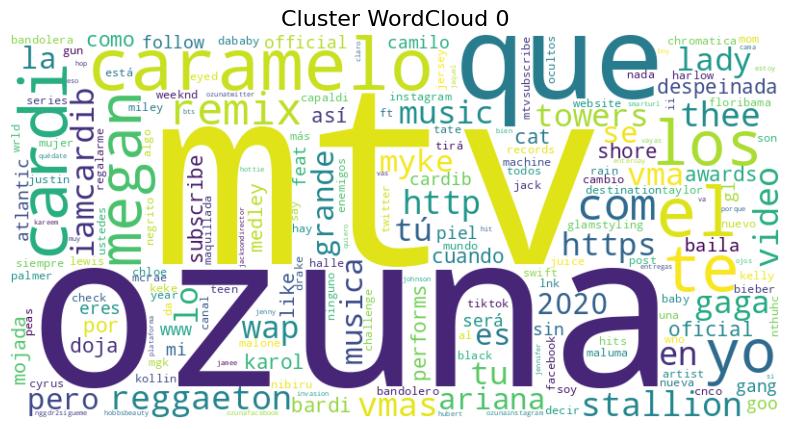

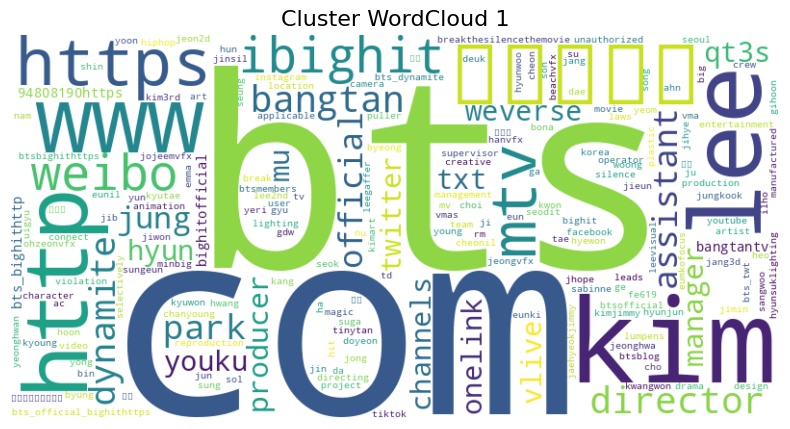

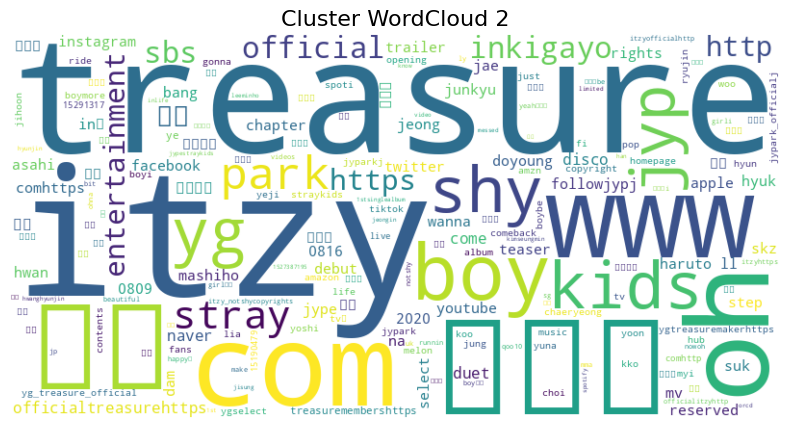

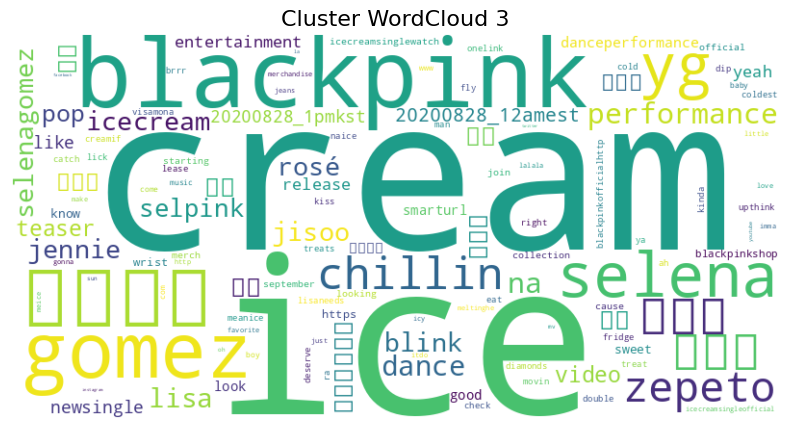

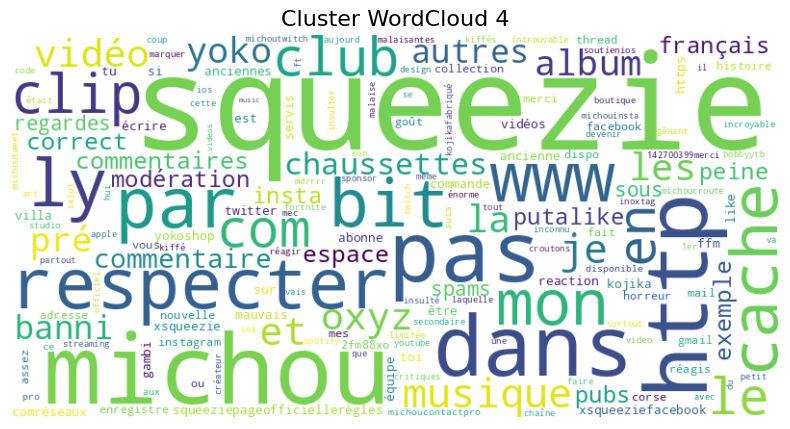

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def plot_wordcloud(tfidf_vector, feature_names, title):
    # pretvaranje od matrica vo array
    tfidf_array = np.asarray(tfidf_vector).ravel()

    #kreiranje recnik so frekvencii
    word_freq = {feature_names[i]: tfidf_array[i] for i in range(len(feature_names))}

    # kreiranje WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# kreiranje WordCloud za sekoj klaster
for cluster in sorted(top_videos_data['cluster'].unique()):
    cluster_indices = top_videos_data[top_videos_data['cluster'] == cluster].index
    cluster_tfidf = tfidf_matrica[cluster_indices].mean(axis=0)
    plot_wordcloud(cluster_tfidf, zborovi, f'Cluster WordCloud {cluster}')


In [ ]:
!pip install transformers
!pip install torch

**Sentiment Analysis**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# vcituvanje na model i tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# prinudno da se koristi CPU
device = torch.device("cpu")
model.to(device)

# top 10 videa i tekst
top_videos_sample = top_videos_data.head(10).copy()
top_videos_sample['full_text_short'] = top_videos_sample['full_text'].str[:300]  # скратен текст

def get_sentiment_batch(texts, batch_size=10):
    labels = ['Negative', 'Neutral', 'Positive']
    sentiments = []
    confidences = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=300)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        scores = softmax(outputs.logits.cpu().numpy(), axis=1)
        batch_labels = [labels[s.argmax()] for s in scores]
        batch_conf = [s.max() for s in scores]
        sentiments.extend(batch_labels)
        confidences.extend(batch_conf)

    return sentiments, confidences

top_videos_sample['sentiment'], top_videos_sample['confidence'] = get_sentiment_batch(top_videos_sample['full_text_short'].tolist())


top_videos_sample[['title', 'sentiment', 'confidence']]


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

,title,sentiment,confidence
0,ITZY “Not Shy” M/V TEASER,Neutral,0.828516
1,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,Neutral,0.850443
2,Michou - Dans le club (Clip Officiel),Neutral,0.538951
3,la vengeance de ce mec est incroyable,Neutral,0.820698
4,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Neutral,0.859238
5,[TinyTAN l ANIMATION] - Magic Door,Neutral,0.716154
6,TREASURE – ‘BOY’ 0809 SBS Inkigayo,Neutral,0.891719
7,TREASURE - 'BOY' M/V,Neutral,0.886956
8,BTS (방탄소년단) 'BREAK THE SILENCE: THE MOVIE' Off...,Neutral,0.841080
9,TREASURE – ‘BOY’ 0816 SBS Inkigayo,Neutral,0.892711


/tmp/ipython-input-3967084091.py:12: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3967084091.py:12: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3967084091.py:12: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print

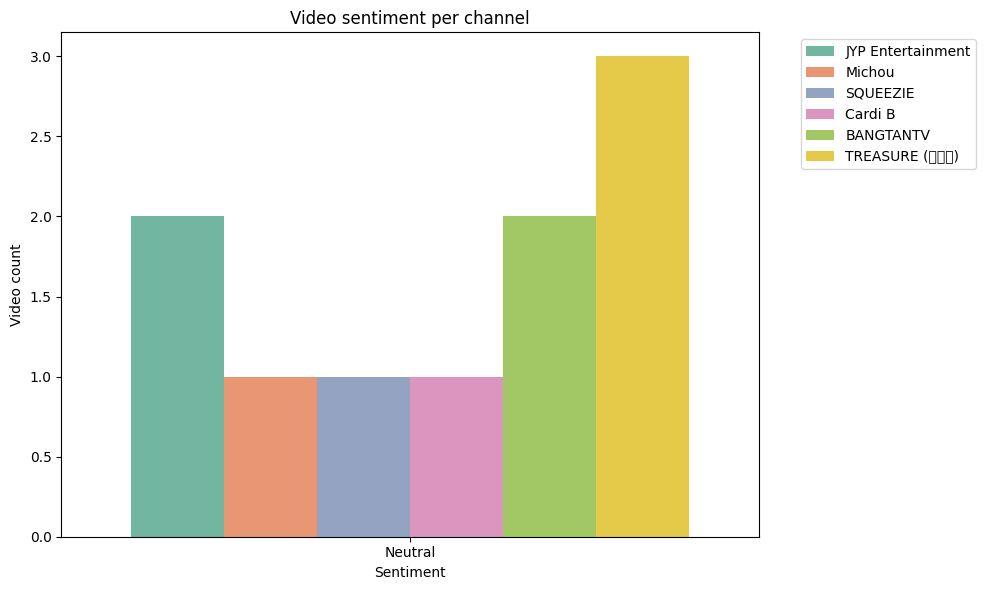

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.countplot(data=top_videos_sample, x='sentiment', hue='channelTitle', palette='Set2')
plt.title("Video sentiment per channel")
plt.xlabel("Sentiment")
plt.ylabel("Video count")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Performance analysis**

/tmp/ipython-input-4107791452.py:29: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4107791452.py:29: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4107791452.py:29: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print

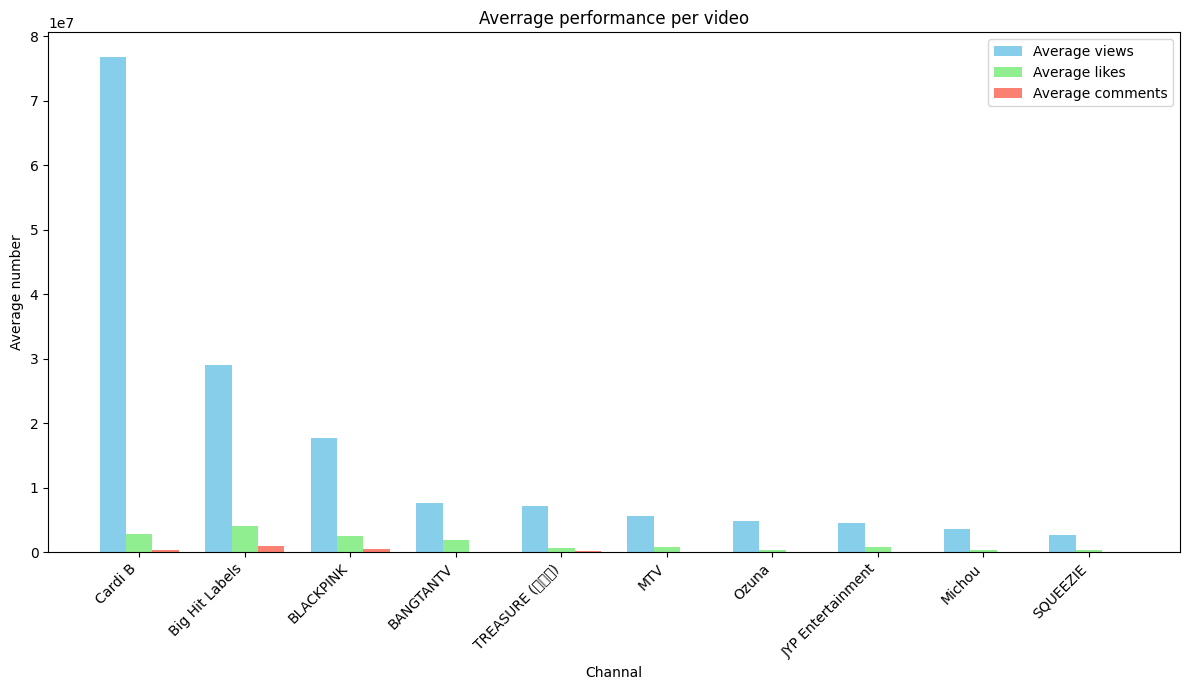

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top_videos_data['view_count'] = pd.to_numeric(top_videos_data['view_count'], errors='coerce')
top_videos_data['likes'] = pd.to_numeric(top_videos_data['likes'], errors='coerce')
top_videos_data['comment_count'] = pd.to_numeric(top_videos_data['comment_count'], errors='coerce')

channel_perf = top_videos_data.groupby('channelTitle').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'comment_count': 'mean'
}).reset_index()

top_channels = channel_perf.sort_values('view_count', ascending=False).head(10)

plt.figure(figsize=(12,7))
bar_width = 0.25
x = range(len(top_channels))

plt.bar(x, top_channels['view_count'], width=bar_width, label='Average views', color='skyblue')
plt.bar([p + bar_width for p in x], top_channels['likes'], width=bar_width, label='Average likes', color='lightgreen')
plt.bar([p + 2*bar_width for p in x], top_channels['comment_count'], width=bar_width, label='Average comments', color='salmon')

plt.xticks([p + bar_width for p in x], top_channels['channelTitle'], rotation=45, ha='right')
plt.title('Averrage performance per video')
plt.xlabel('Channal')
plt.ylabel('Average number')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2909676056.py:18: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2909676056.py:18: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2909676056.py:18: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print

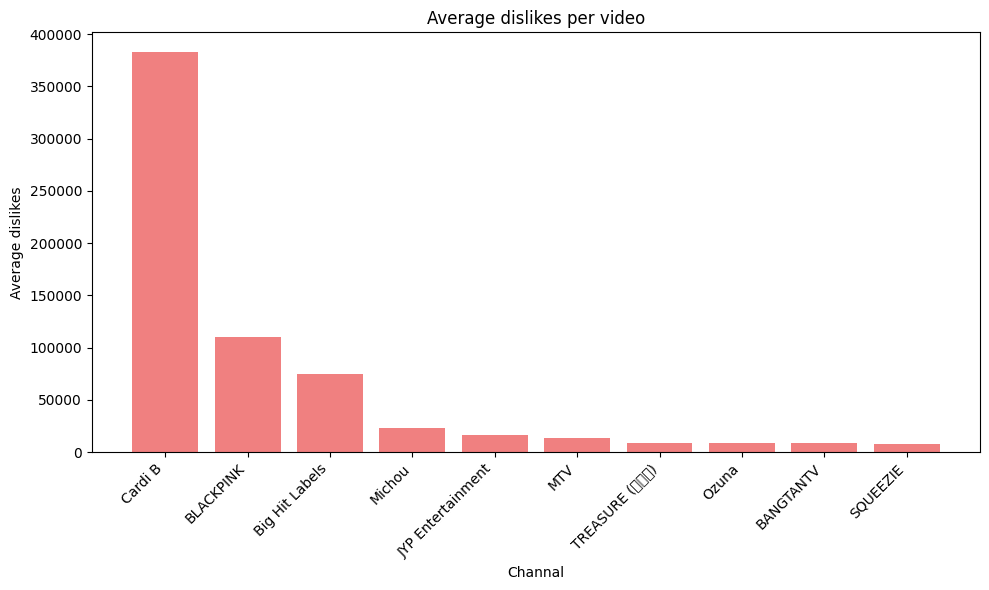

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top_videos_data['view_count'] = pd.to_numeric(top_videos_data['view_count'], errors='coerce')
top_videos_data['likes'] = pd.to_numeric(top_videos_data['likes'], errors='coerce')
top_videos_data['comment_count'] = pd.to_numeric(top_videos_data['comment_count'], errors='coerce')
top_videos_data['dislikes'] = pd.to_numeric(top_videos_data['dislikes'], errors='coerce')
# Average dislikes
dislikes_perf = top_videos_data.groupby('channelTitle')['dislikes'].mean().reset_index()
top_dislikes = dislikes_perf.sort_values('dislikes', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_dislikes['channelTitle'], top_dislikes['dislikes'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.title('Average dislikes per video')
plt.xlabel('Channal')
plt.ylabel('Average dislikes')
plt.tight_layout()
plt.show()

In [6]:
import nbformat

path = "YT_analyzer.ipynb"
nb = nbformat.read(path, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

nbformat.write(nb, path)
print("Notebook fixed and saved!")


Notebook fixed and saved!
